# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# import dependences
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
import json as js
import numpy as np
from scipy.stats import linregress

# import citipy module to find city based on latitude and longtitude
from citipy import citipy

# Google developer API key
from api_keys import g_key, weather_api_key


## Generate Cities List

In [7]:
# randomly generate list of latitude, longtitude values in the range of latitude and longtitude
lat_range = (-90, 90)
lon_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1200)


In [8]:
# zipping lat, lon for looping
lat_lons = zip(lats, lons)

# define cities as an empty list to store city results 
cities = []

# looping to create the cities list with latitude and longtitude values using citipy module
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    if city not in cities:
        cities.append(city)

# checking the results in cities list
len(cities)

522

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# set metric as units
units = "metric"

# build partial url query
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# setting up lists to store data 
city_name = []
lat = []
lon = []
humidity = []
wind_speed = []
temp_max = []
cloudiness = []
country = []
date = []

counter = 1
setnum = 1
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
for city in cities:
    # build url query with city name
    query_url = f"{url}{city}"
    response = rq.get(query_url).json()
    
    # using try & except to handle error (if any)
    try:
        # print status while processing data
        print(f"Processing Record {counter} of Set {setnum} | {city}")
    
        # assign data to the lists
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        
        # increase counter
        counter += 1
        
        if counter > 100:
            setnum += 1 # increase the number of set
            counter = 1 # reset counter
    except:
        # print out message if results in the city not found
        print(f'Skipping {city}')
        pass
print('Data Retreival Complete')

Beginning Data Retrieval
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | skibbereen
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | grand river south east
Skipping grand river south east
Processing Record 6 of Set 1 | palabuhanratu
Skipping palabuhanratu
Processing Record 6 of Set 1 | emerald
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | bandar-e lengeh
Processing Record 9 of Set 1 | linjiang
Processing Record 10 of Set 1 | gazanjyk
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | kurchum
Processing Record 13 of Set 1 | bosaso
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | bolungarvik
Skipping bolungarvik
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | charters towers
Processing Record

Processing Record 70 of Set 2 | chancay
Processing Record 71 of Set 2 | kozlovka
Processing Record 72 of Set 2 | zabid
Processing Record 73 of Set 2 | dicabisagan
Processing Record 74 of Set 2 | manati
Processing Record 75 of Set 2 | saint george
Processing Record 76 of Set 2 | kodoli
Processing Record 77 of Set 2 | mogadishu
Processing Record 78 of Set 2 | kazalinsk
Skipping kazalinsk
Processing Record 78 of Set 2 | bakersfield
Processing Record 79 of Set 2 | coruripe
Processing Record 80 of Set 2 | kununurra
Processing Record 81 of Set 2 | kaduqli
Processing Record 82 of Set 2 | berlevag
Processing Record 83 of Set 2 | beeville
Processing Record 84 of Set 2 | uwayl
Skipping uwayl
Processing Record 84 of Set 2 | constitucion
Processing Record 85 of Set 2 | port moresby
Processing Record 86 of Set 2 | kodinsk
Processing Record 87 of Set 2 | poum
Processing Record 88 of Set 2 | comodoro rivadavia
Processing Record 89 of Set 2 | turukhansk
Processing Record 90 of Set 2 | jamestown
Proces

Processing Record 55 of Set 4 | la rioja
Processing Record 56 of Set 4 | porto seguro
Processing Record 57 of Set 4 | bull savanna
Processing Record 58 of Set 4 | mattru
Processing Record 59 of Set 4 | tottori
Processing Record 60 of Set 4 | devecser
Processing Record 61 of Set 4 | artyk
Skipping artyk
Processing Record 61 of Set 4 | coihaique
Processing Record 62 of Set 4 | darnah
Processing Record 63 of Set 4 | vardo
Processing Record 64 of Set 4 | sosnogorsk
Processing Record 65 of Set 4 | port hardy
Processing Record 66 of Set 4 | buesaco
Processing Record 67 of Set 4 | mangrol
Processing Record 68 of Set 4 | mount gambier
Processing Record 69 of Set 4 | sinnamary
Processing Record 70 of Set 4 | san ramon
Processing Record 71 of Set 4 | sao felix do xingu
Processing Record 72 of Set 4 | erzin
Processing Record 73 of Set 4 | eldoret
Processing Record 74 of Set 4 | awjilah
Processing Record 75 of Set 4 | fairbanks
Processing Record 76 of Set 4 | port blair
Processing Record 77 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# convert to dataframe
city_data = pd.DataFrame({'City': city_name,
                        'Country': country,
                        'Date': date,
                        'Lat': lat,
                        'Lng': lon,
                        'Max Temp': temp_max,
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Wind Speed': wind_speed})

# save to csv file
city_data.to_csv('../output_data/cities.csv', index_label="City_ID") 

In [11]:
# checkout the city data
city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,1601525399,-54.80,-68.30,-2.00,92,90,12.30
1,New Norfolk,AU,1601525237,-42.78,147.06,15.56,48,65,3.13
2,Husavik,IS,1601525400,66.04,-17.34,4.00,86,90,5.10
3,Skibbereen,IE,1601525400,51.55,-9.27,5.00,93,34,2.10
4,Cidreira,BR,1601525400,-30.18,-50.21,20.32,90,1,4.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# checking if there is any city with Himidity over 100%


# filtering out the city data to acquire only city with Humidity over 100%
reduced_cities = city_data.loc[city_data['Humidity'] > 100]

if reduced_cities.empty == True:
    print('There is no city with humidity over 100% in the selected dataset.')

else:
    #  Get the indices of cities that have humidity over 100%.
    reduced_cities_indexes = reduced_cities.index
    
    # print out list of index for cities with humidity over 100%
    print(reduced_cities.index)
    
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    clean_city_data = city_data.drop(reduced_cities_indexes, inplace=False)
    clean_city_data.head()
    
    # matching the clean data to the city_data dataframe for plotting
    city_data = clean_city_data
    
    # copy clean_city_data to csv file
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City_ID", header=True)

There is no city with humidity over 100% in the selected dataset.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

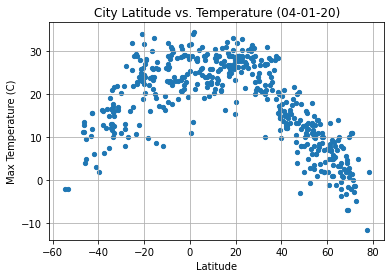

In [18]:
# plotting scatter chart
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", s=18)

# giving title and labels to the chart
plt.title("City Latitude vs. Temperature (04-01-20)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# save chart to image file and display chart
plt.savefig("../Images/MaxTemp_vs_Latitude.png")
plt.show()

## Latitude vs. Humidity Plot

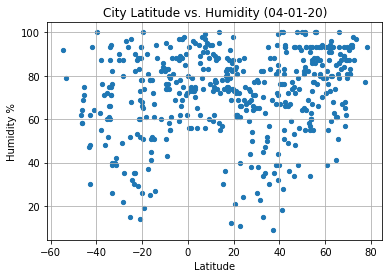

In [19]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", s=18)
plt.title(f"City Latitude vs. Humidity (04-01-20)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/MaxTemp_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

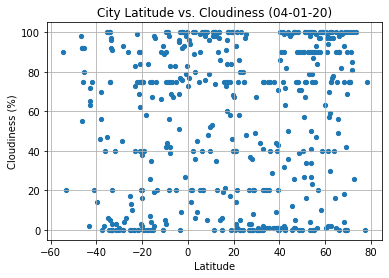

In [20]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", s=18)
plt.title("City Latitude vs. Cloudiness (04-01-20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/MaxTemp_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

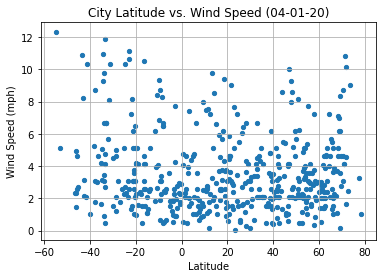

In [21]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", s=18)
plt.title("City Latitude vs. Wind Speed (04-01-20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/MaxTemp_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [22]:
# generating northern and southern hemisphere data for plotting
northern_hemi = city_data.loc[city_data['Lat'] > 0]
southern_hemi = city_data.loc[city_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8623550434075102


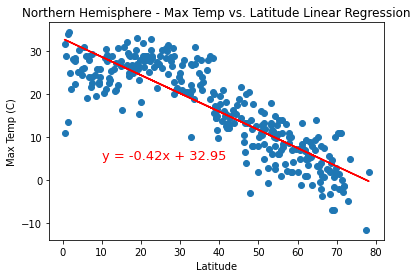

In [25]:
# storing northern hemisphere latitude to x_values
x_values = northern_hemi['Lat']

# assigning the max temperature to y_values
y_values = northern_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f'The r-value is: {rvalue}')
plt.annotate(line_eq,(10,5),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7044132602621866


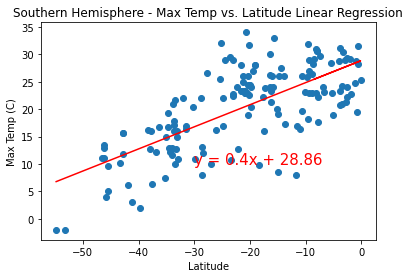

In [26]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1385821666499033


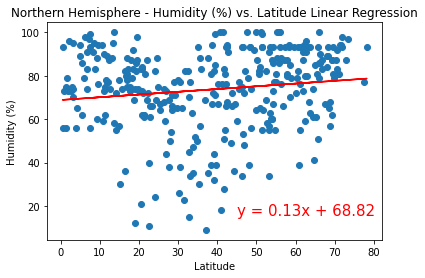

In [29]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f'The r-value is: {rvalue}')
plt.annotate(line_eq,(45,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7044132602621866


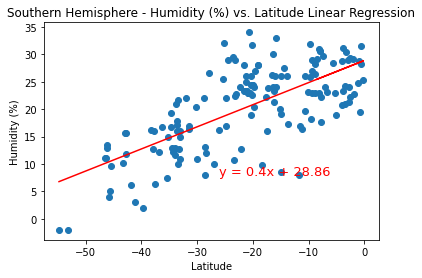

In [30]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-26,8),fontsize=13,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07306735098541355


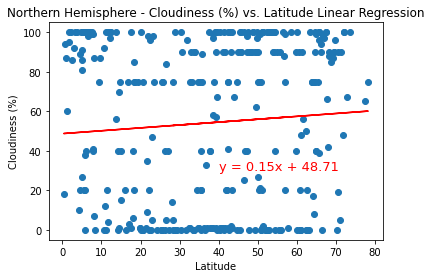

In [43]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15681538461237615


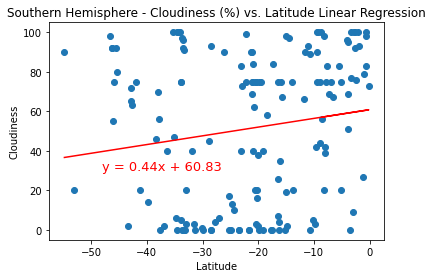

In [31]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-48,30),fontsize=13,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09104862387634811


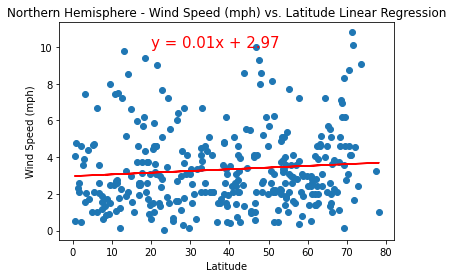

In [32]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28487734120560426


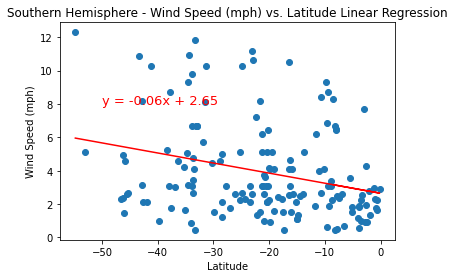

In [33]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=13,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()